<a href="https://colab.research.google.com/github/yuxizhe/HTML-UI-datasets-generate/blob/master/opencv_%E7%9F%A9%E5%BD%A2%E6%A3%80%E6%B5%8B%E7%BB%93%E6%9E%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget 'https://drive.google.com/uc?export=download&id=1XRBS9hxK4l1zMQuMNZuefa12r52yKwX2' -O pic.zip
!rm -rf pic
!unzip -q pic.zip

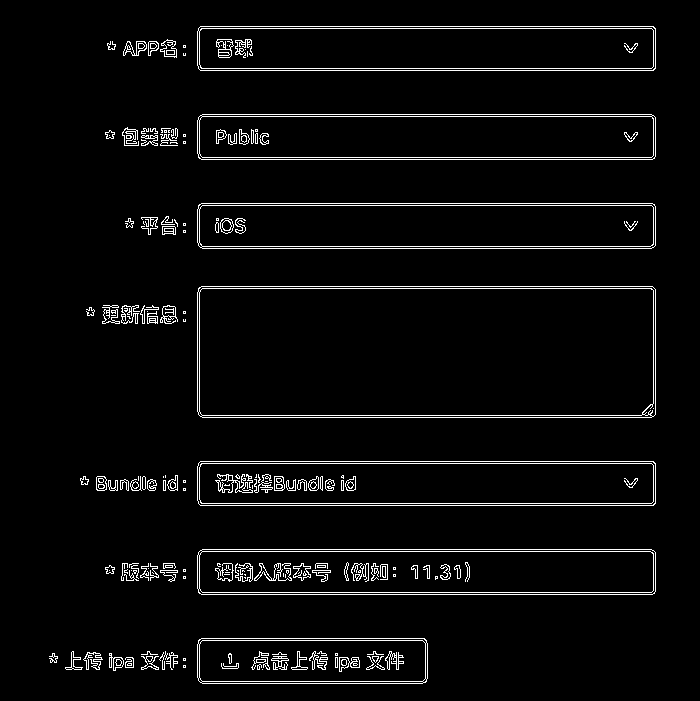

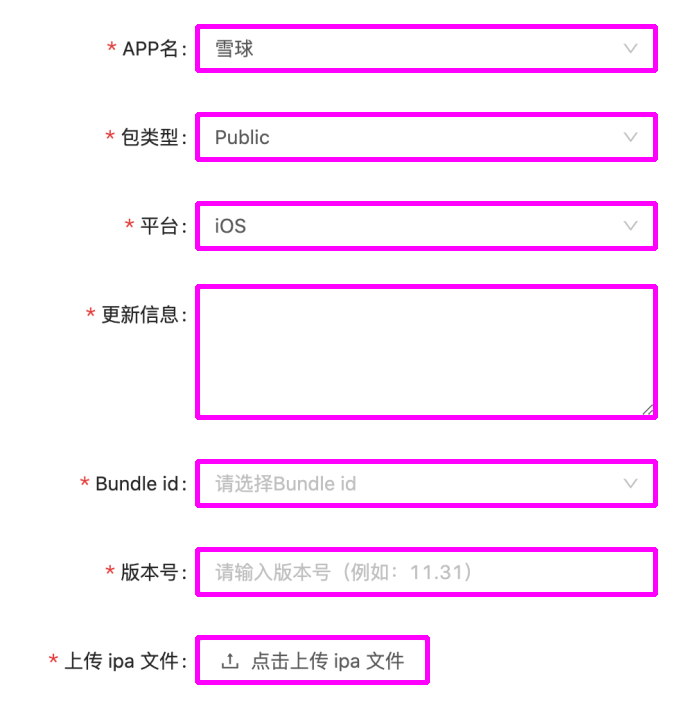

矩形元素个数 7


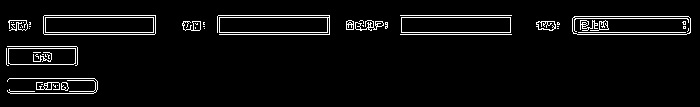

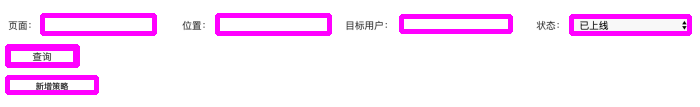

矩形元素个数 7


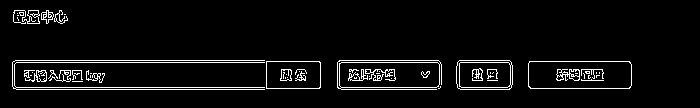

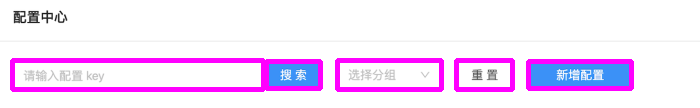

矩形元素个数 5


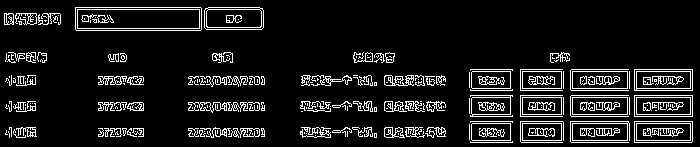

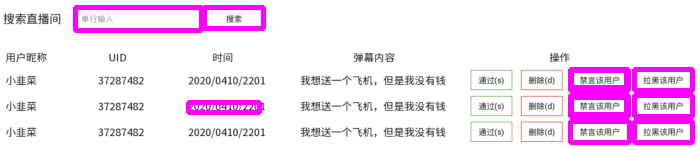

矩形元素个数 11


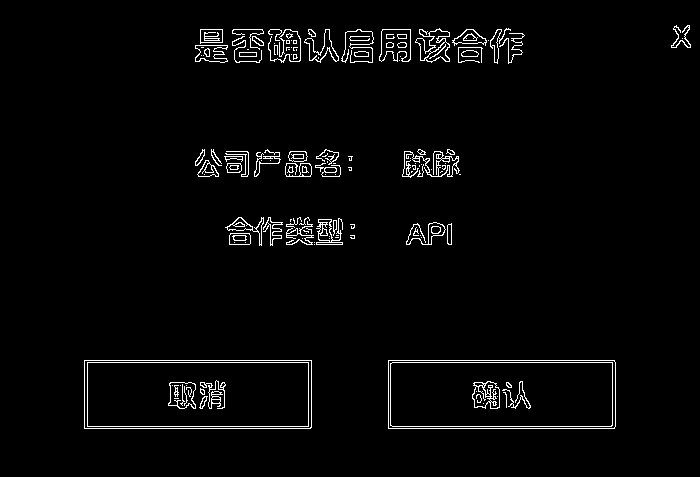

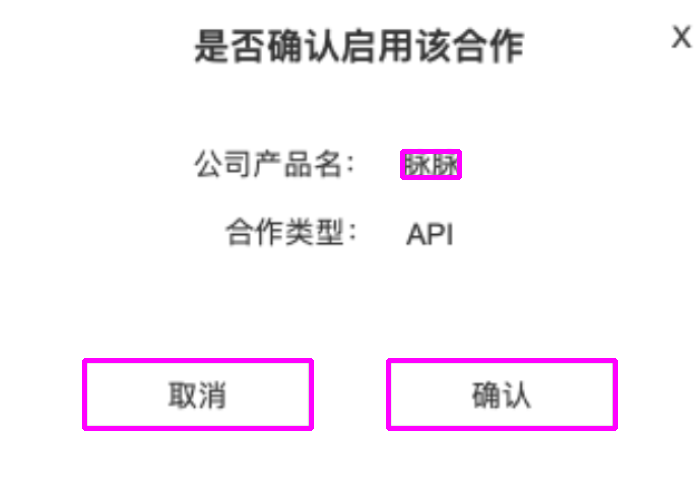

矩形元素个数 3


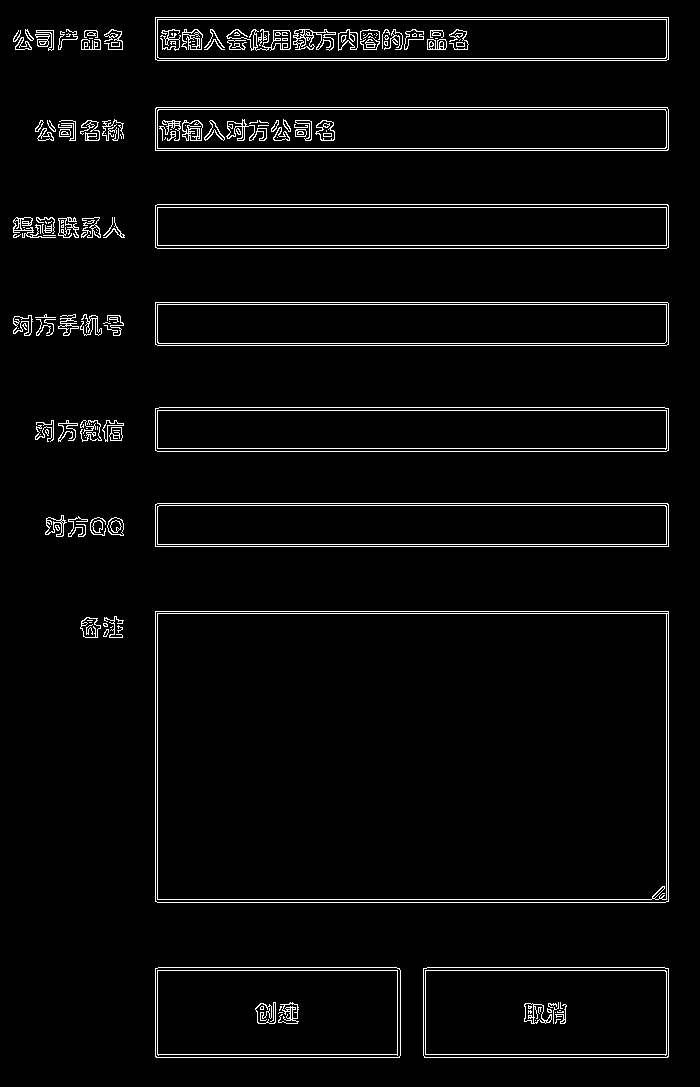

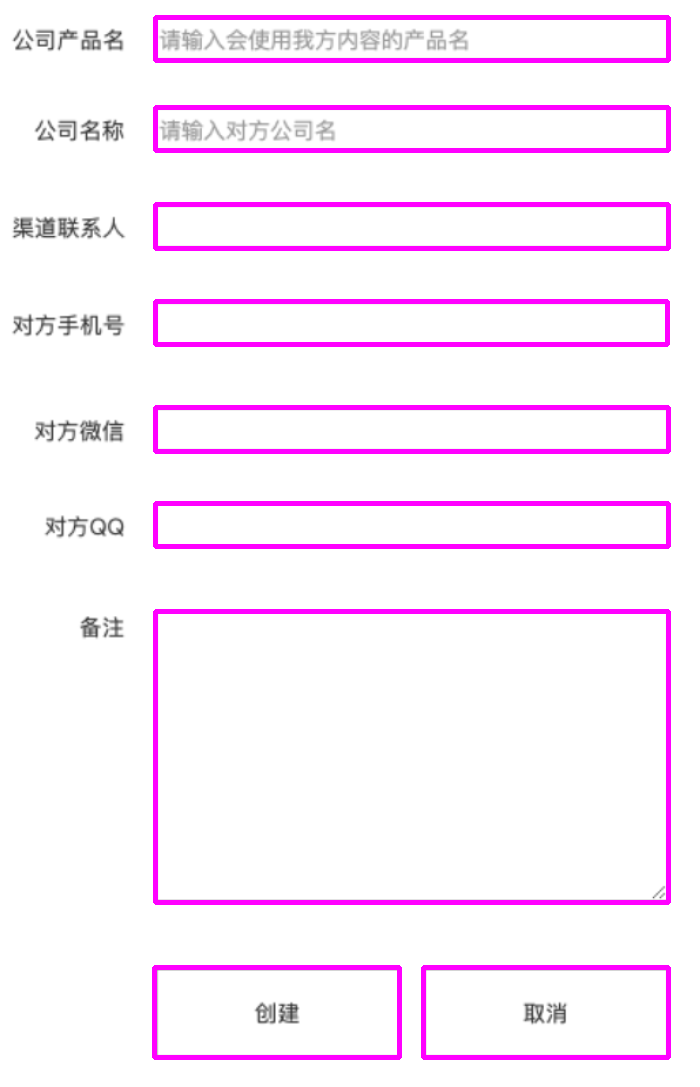

矩形元素个数 9


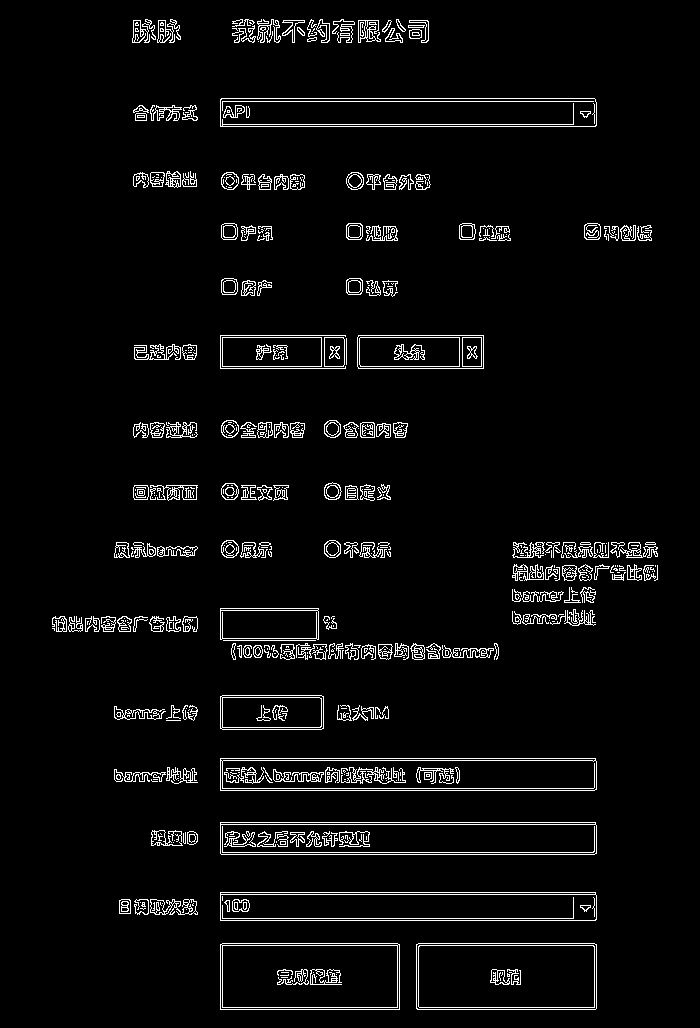

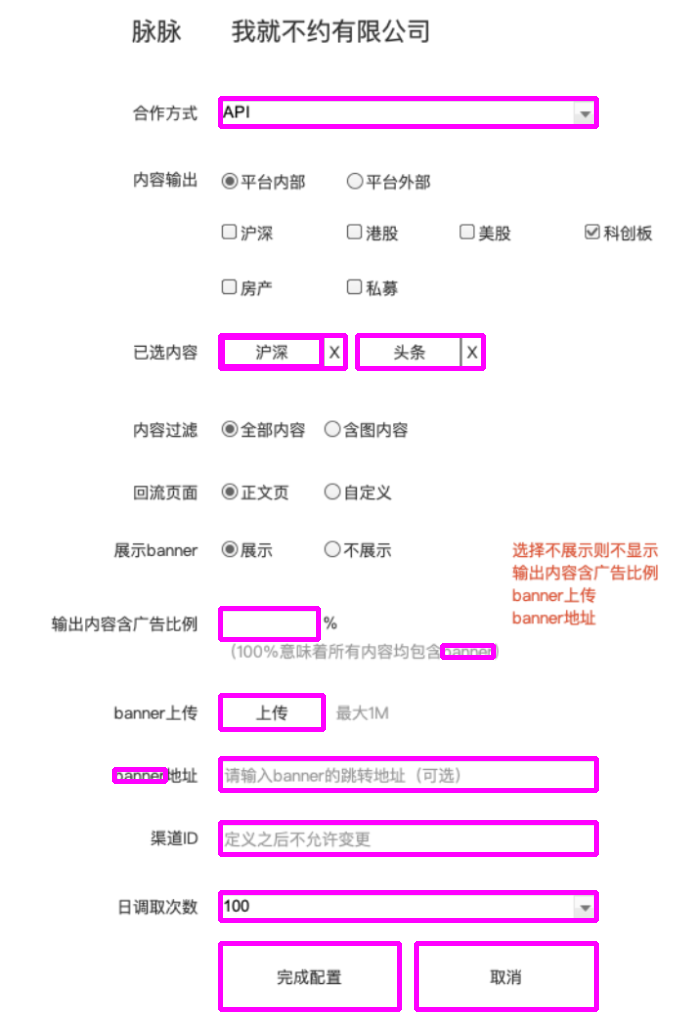

矩形元素个数 13


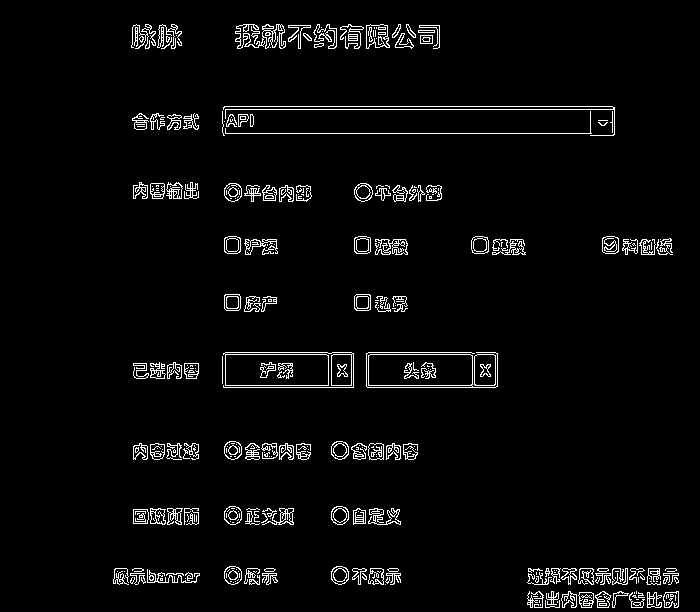

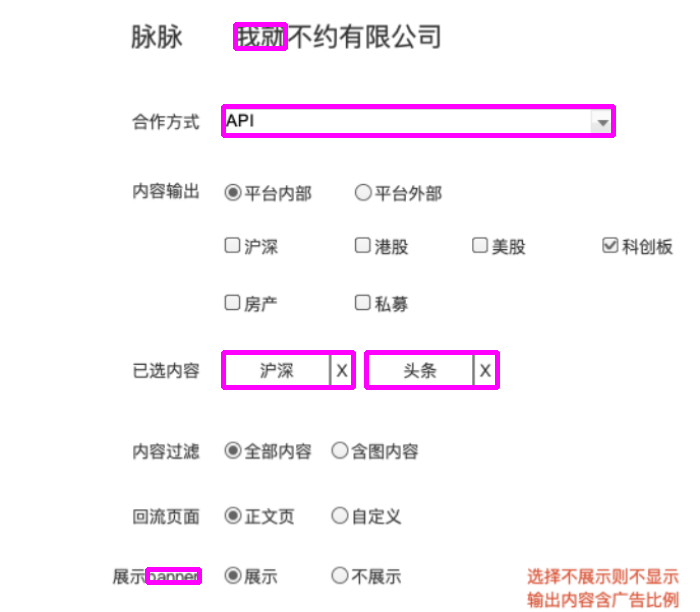

矩形元素个数 5


In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
for i in range(8):
  img = cv2.imread('/content/pic/crm/'+str(i + 1)+'.png')
  # img resize to 700
  img = cv2.resize(img, (700,int(700/img.shape[1]*img.shape[0])), interpolation=cv2.INTER_AREA)
  #cv2_imshow(img)
  # 转为灰度
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # 边缘检测
  binary = cv2.Canny(gray,50,100)
  #ret,binary = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

  cv2_imshow(binary)

  #检测轮廓
  # RETR_EXTERNAL  表示只检测最外层轮廓
  contours, hier = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  #print(contours)
  trueBoxes = []
  for c in contours:  #遍历轮廓
      rect = cv2.minAreaRect(c)  #生成最小外接矩形
      box_ = cv2.boxPoints(rect)
      h = abs(box_[3, 1] - box_[1, 1])
      w = abs(box_[3, 0] - box_[1, 0])
      #print("宽，高",w,h)
      #只保留需要的轮廓
      if (h > 500 or w > 600):
          continue
      if (h < 10 or w < 50):
          continue
      #print("宽，高",w,h)
      trueBoxes.append(box_)
      box = cv2.boxPoints(rect)  # 计算最小面积矩形的坐标
      box = np.int0(box)  # 将坐标规范化为整数
      # 绘制矩形
      cv2.drawContours(img, [box], 0, (255, 0, 255), 3)
  cv2_imshow(img)
  print("矩形元素个数", len(trueBoxes))
  #print(trueBoxes)
